# Описание

Решение задачи классификации типа стекол. Данные для обучения моделей можно скачать с [сайта](https://www.kaggle.com/datasets/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

## Импорт библиотек

In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

## Этап 1. Получение данных и загрузка их в рабочую среду

In [2]:
data = pd.read_csv("../data/raw/glass.csv")
features = data.columns[:-1].tolist()

In [3]:
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

## Этап 2. Проведение первичного анализа

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### a) Проверка количества записей для каждого класса

In [7]:
class_counts = data["Type"].value_counts()
print("Количество записей для каждого класса:\n", class_counts)

Количество записей для каждого класса:
 Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [8]:
# Вывод завершился, можно сделать выводы по классам
total_count = len(data)
print("\nОбщее количество записей:", total_count)


Общее количество записей: 214


In [9]:
# Сравнение классов
print("\nСравнение классов:")
for cls, count in class_counts.items():
    print(f"Класс {cls}: {count} записей ({(count / total_count) * 100:.2f}%)")


Сравнение классов:
Класс 2: 76 записей (35.51%)
Класс 1: 70 записей (32.71%)
Класс 7: 29 записей (13.55%)
Класс 3: 17 записей (7.94%)
Класс 5: 13 записей (6.07%)
Класс 6: 9 записей (4.21%)


## Этап 3. Разделение выборки на обучающее и тестовое подмножество

In [10]:
X = data.drop("Type", axis=1)
y = data["Type"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

## Этап 4. Обучение модели дерева решений RandomForestClassifier

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Этап 5. Предсказание типа стекла и оценка точности

In [12]:
y_pred_rf = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Метрики до удаления выбросов:\n{accuracy:.2f}")

Метрики до удаления выбросов:
0.84


## Этап 6. Обработка выбросов в данных

### a) Визуализация распределения значений для каждой переменной

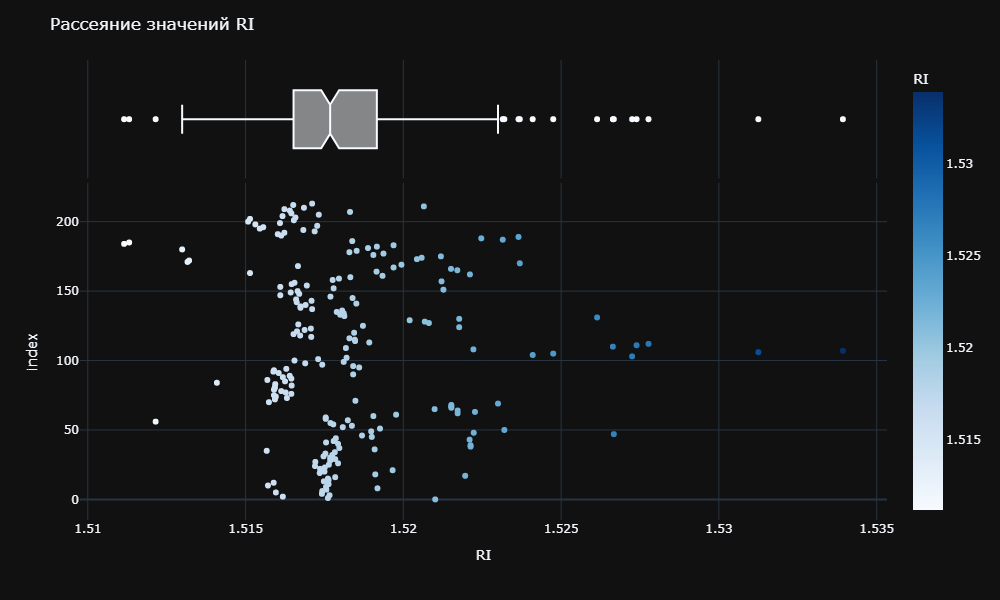

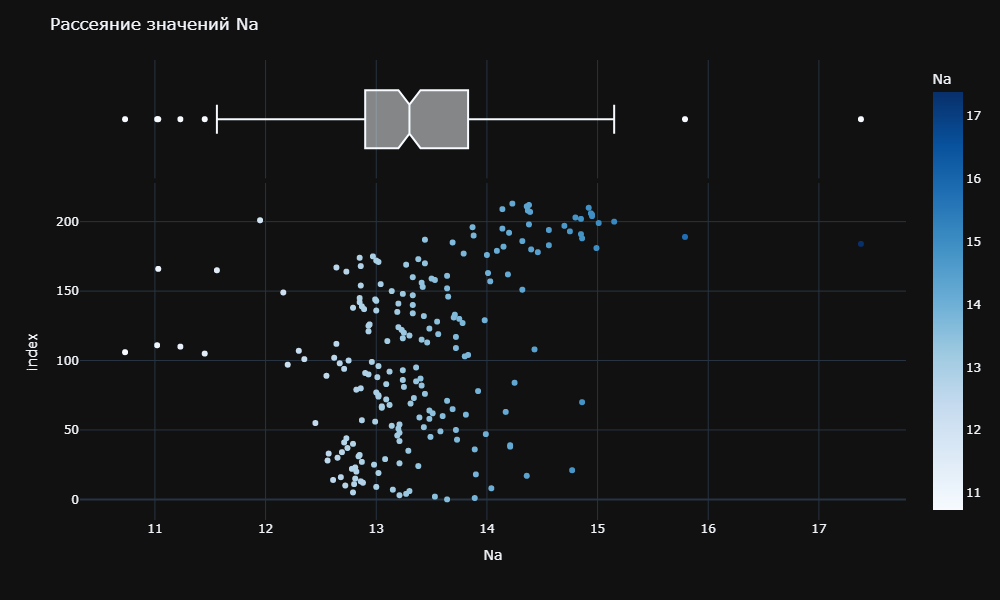

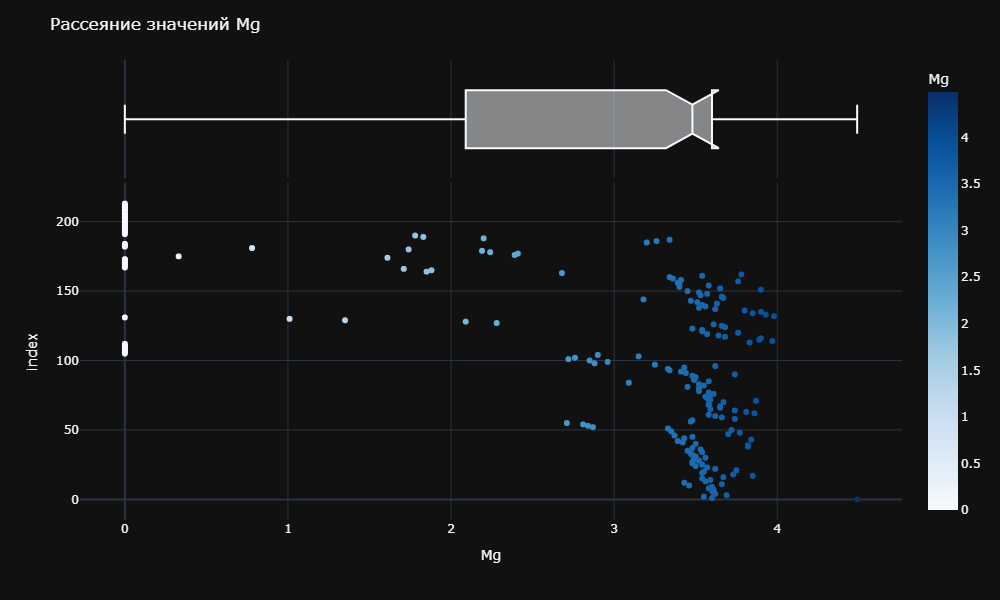

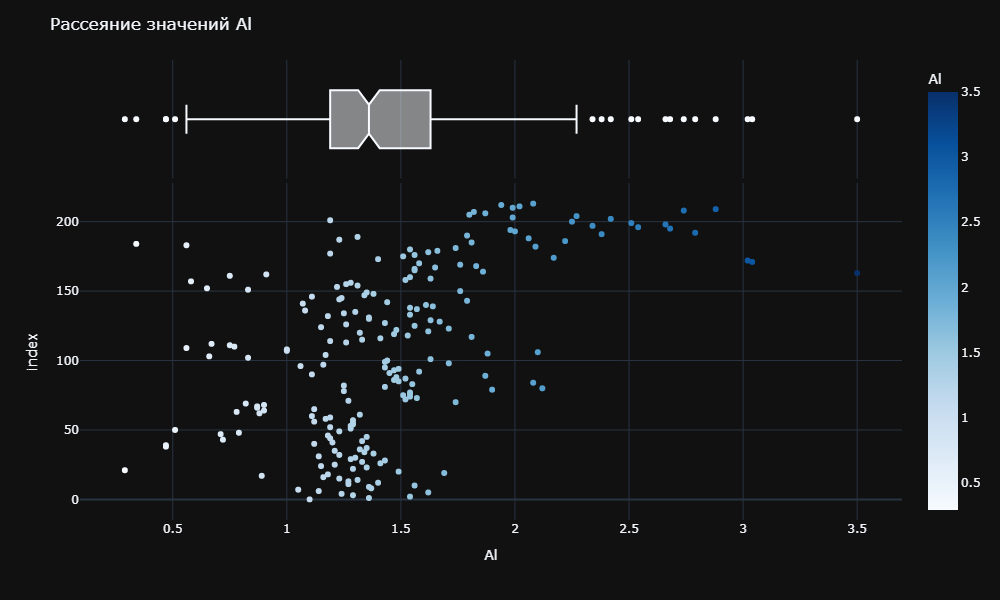

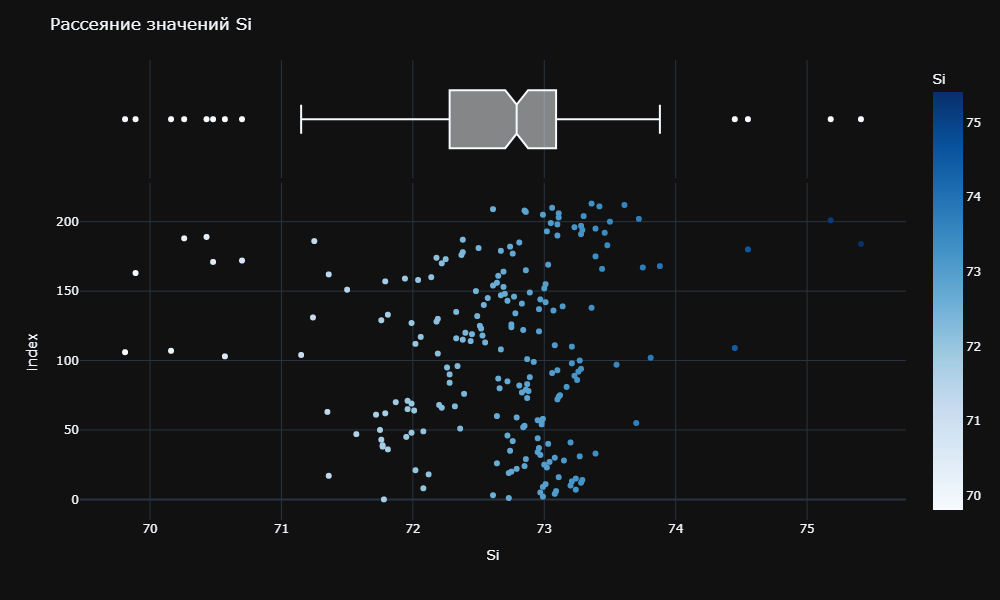

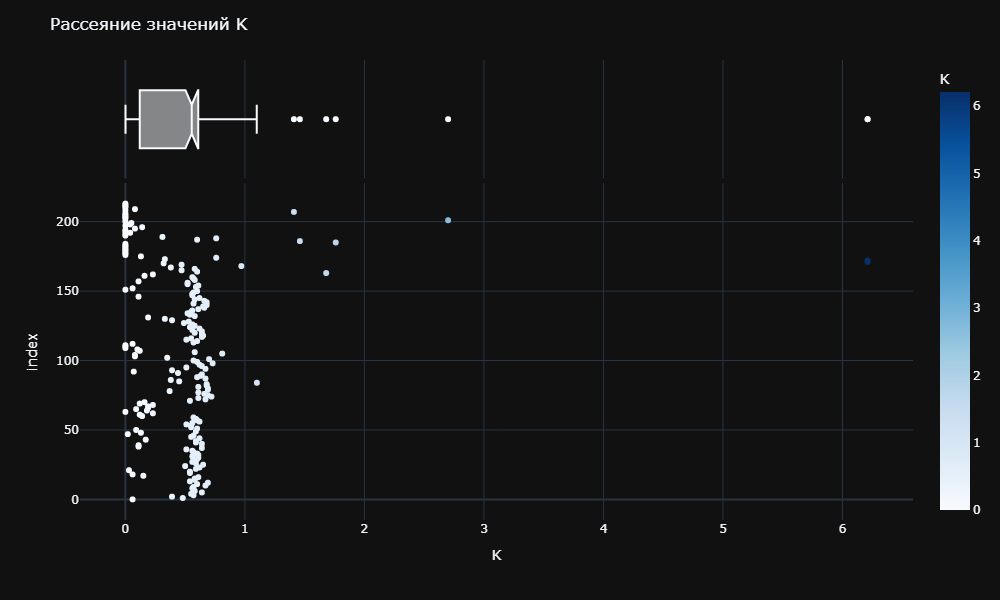

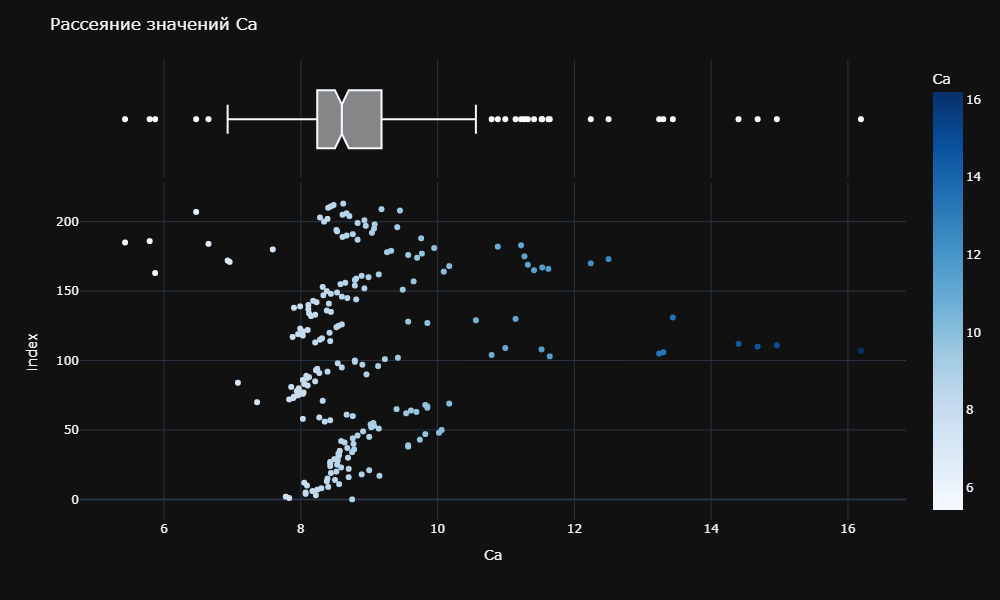

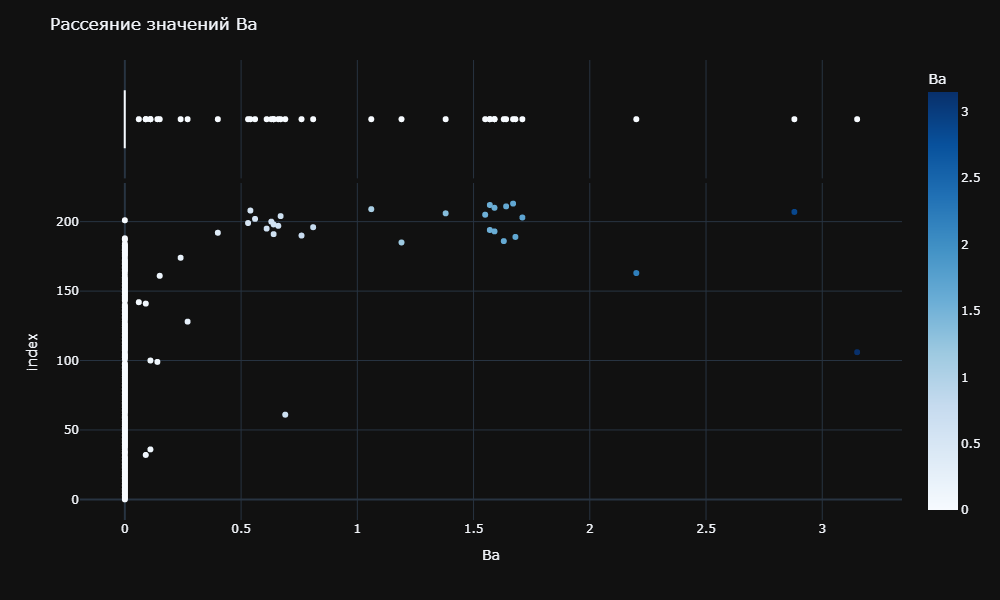

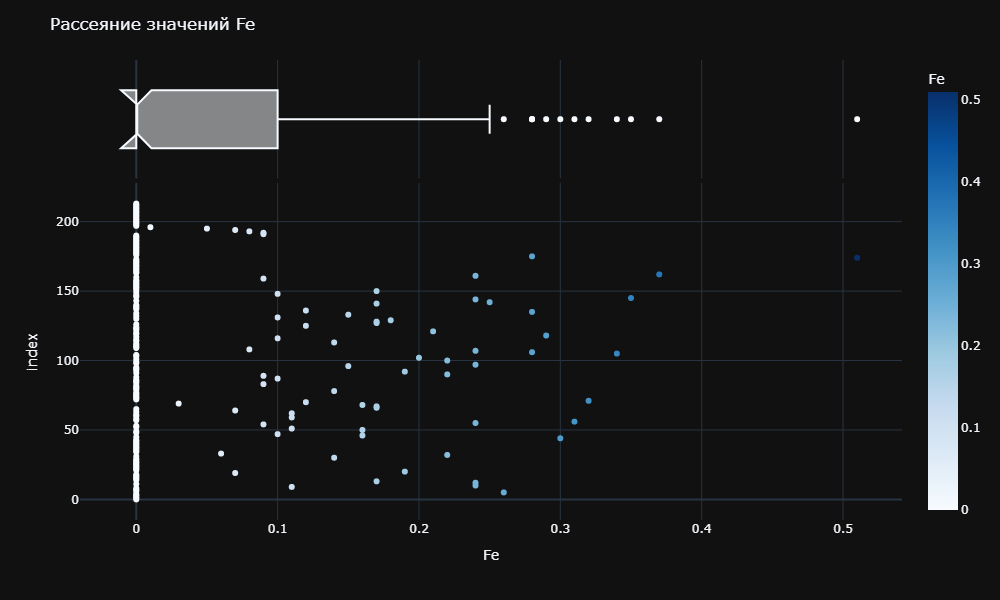

In [13]:
for col in X.columns:
    if col != "Type":  # Исключаем категориальный столбец 'Type'
        # Создание диаграммы рассеяния
        fig = px.scatter(
            X,
            x=col,  # Значения для оси X
            y=X.index,  # Использование индекса DataFrame для оси Y
            marginal_x="box",  # Добавление боксплота по оси Y для анализа распределения значений
            color=col,  # Окрашивание по текущему столбцу
            color_continuous_scale=px.colors.sequential.Blues,  # Указываем цветовую схему "Blues"
        )

        # Настройка параметров макета графика
        fig.update_layout(
            title=f"Рассеяние значений {col}",  # Заголовок графика
            template="plotly_dark",  # Темный шаблон
            height=600,  # Высота графика
            width=1000,  # Ширина графика
        )

        # Отображение графика
        fig.show("png")

### b) Исследование признаков на выбросы

In [14]:
# Используем 1.5 IQR для нахождения выбросов
def outlier_hunt(df):
    """
    Принимает DataFrame df с признаками и возвращает список индексов
    наблюдений, содержащих более 2 выбросов.
    """
    outlier_indices = []  # Список для хранения индексов выбросов

    # Проходимся по всем признакам (столбцам)
    for col in df.columns.tolist():
        # 1-й квартиль (25%)
        Q1 = np.percentile(df[col], 25)

        # 3-й квартиль (75%)
        Q3 = np.percentile(df[col], 75)

        # Интерквартильный размах (IQR)
        IQR = Q3 - Q1

        # Шаг для определения выбросов
        outlier_step = 1.5 * IQR

        # Определяем список индексов выбросов для текущего признака col
        outlier_list_col = df[
            (df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)
        ].index

        # Добавляем найденные индексы выбросов в общий список
        outlier_indices.extend(outlier_list_col)

    # Отбираем наблюдения, содержащие более 2 выбросов
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)

    return multiple_outliers  # Возвращаем список индексов наблюдений с более чем 2 выбросами


# Выводим количество наблюдений с более чем 2 выбросами
print(
    "В наборе данных содержится %d наблюдений с более чем 2 выбросами"
    % (len(outlier_hunt(data[features])))
)

В наборе данных содержится 14 наблюдений с более чем 2 выбросами


In [15]:
data_cleaned = outlier_hunt(df=data[features])
X_cleaned = data.drop(data_cleaned).reset_index(drop=True)
y_cleaned = y[X_cleaned.index]
print(X_cleaned.shape)

(200, 10)


### Подсчет процента удаленных записей

In [16]:
removed_percentage = (1 - (X_cleaned.shape[0] / total_count)) * 100
print(f"\nПроцент удаленных записей от общего числа: {removed_percentage:.2f}%")


Процент удаленных записей от общего числа: 6.54%


## Этап 7. Повтореное обучение модели после удаления выбросов

In [17]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=RANDOM_STATE
)
rf_model_cleaned = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)
y_pred_rf_cleaned = rf_model_cleaned.predict(X_test_cleaned)
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_rf_cleaned)
print(f"Точность после удаления выбросов:\n {accuracy_cleaned:.2f}")

Точность после удаления выбросов:
 0.93


## Вывод

### а) Преобразования данных: удаление выбросов, визуализация распределений.

В ходе работы был проведён первичный анализ данных, в результате которого были выявлены выбросы, значительно влияющие на общее распределение и характеристики выборки. Для обработки выбросов были применены следующие методы:

`Метод межквартильного размаха (IQR)`: Определение выбросов на основе интерквартильного размаха позволило выявить значения, выходящие за пределы 1,5 * IQR от первого и третьего квартилей.

`Визуализация данных`: Для более глубокого понимания структуры данных были построены ящик с усами (boxplot) и графики рассеяния (scatter plots), что наглядно продемонстрировало наличие выбросов в различных переменных.
Эти шаги позволили не только выявить нежелательные значения, но и улучшить качество аналитики за счёт более чистых и релевантных данных.

### б) Сравнение точности двух моделей

In [18]:
print(
    f"\nСравнение точностей:\nТочность до удаления выбросов:\n {accuracy:.2f}\nТочность после удаления выбросов:\n {accuracy_cleaned:.2f}"
)


Сравнение точностей:
Точность до удаления выбросов:
 0.84
Точность после удаления выбросов:
 0.93


Сравнение результатов показывает, что обработка выбросов положительно сказалась на показателях модели. Точность после удаления выбросов увеличились, что свидетельствует об улучшении её способности точно классифицировать объекты.

### в) Мнение о необходимости исследования данных на выбросы

- Исследование данных на выбросы важно, так как выбросы могут искажать результаты и влиять на качество модели.

- Плюсы: улучшение точности модели, более корректная интерпретация данных.
- Минусы: удаление может привести к утере данных и информационной потере.